In [40]:
#useful libraries
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

In [41]:
#Sobel's kernels for derivatives
x_derivative = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

y_derivative = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])


In [42]:
#finding the size of the image after convolution
def target_size(w: int, h: int, ker_size: int)-> np.array:
    conv_size = np.zeros((2,))
    for i in range(w):
        added0 = i + ker_size
        if added0 <= w:
            conv_size[0] += 1
    for j in range(h):
        added1 = j + ker_size
        if added1 <= h:
            conv_size[1] += 1
    return conv_size


In [43]:
#performs part of the co
def muladd(img: np.array, ker: np.array)->np.array:
   cimg_size = target_size(img.shape[0], img.shape[1], ker.shape[0])
   ker_transform = np.zeros(shape=(ker.shape[0], ker.shape[1]))
   for i in range(ker.shape[0]):
      for j in range(ker.shape[1]):
         ker_transform[i,j] = int(ker[ker.shape[0]-1-i, ker.shape[1]-1-j])

   convolved_img = np.zeros(shape=(int(cimg_size[0]),int(cimg_size[1])))
   for i in range(int(cimg_size[0])):
      for j in range(int(cimg_size[1])):
         window = img[i:i+ker.shape[0], j:j+ker.shape[0]]
         convolved_img[i,j] = np.sum(np.multiply(window, ker_transform))
   return convolved_img


In [44]:
def harris_response(IxIx: float, IyIy: float, IxIy: float, k: float)->float:
    return IxIx * IyIy - IxIy ** 2 - k * (IxIx + IyIy)**2


In [45]:
def get_corners(k: float, sigma: float, threshold: float, img: str)->np.array:
    

    input_img = Image.open(img)
    gray_img = ImageOps.grayscale(input_img)
    corners = np.copy(input_img)

    corner_dimension = target_size(int(gray_img.size[0]), int(gray_img.size[1]), 3)

    Ix = muladd(np.array(gray_img), x_derivative)
    Iy = muladd(np.array(gray_img), y_derivative)

    IxIx = gaussian_filter(Ix**2, sigma)
    IxIy = gaussian_filter(Iy*Ix, sigma)
    IyIy = gaussian_filter(Iy**2, sigma)

    for i in range(int(corner_dimension[1])):
        for j in range(int(corner_dimension[0])):
            if harris_response(IxIx[i,j], IyIy[i,j], IxIy[i,j], k) < threshold:
                corners[i,j] = [255,0,0]
                #print(corners[i,j,0])
    return corners


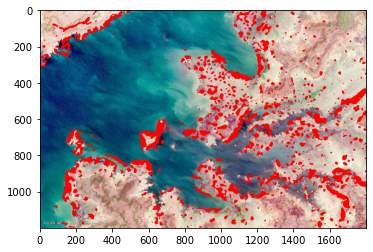

In [53]:
plt.imshow(get_corners(0.17, 5, 120,"google-earth-view-1719.jpg"))